In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aapl = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/aapl.csv')
bac = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/bac.csv')
c = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/c.csv')
f = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/f.csv')
goog = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/goog.csv')
hmc = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/hmc.csv')
msft = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/msft.csv')
tym = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/tym.csv')
wfc = pd.read_csv('C:/Users/Adi/Desktop/Fall-22 Study Material/CSE 482/HW/HW2/stocks/wfc.csv')


In [3]:
def close(df):
    closing = df['Close']
    cdate = df['Date'].values
    N = closing.size
    cdate = cdate[:N-1]
    change = closing[:N-1].values - closing [1:].values
    df_s = pd.DataFrame(change, index = cdate)
    return df_s

In [4]:
aapl_s = close(aapl)
aapl_s = aapl_s.rename(columns={0: "aapl"})
bac_s = close(bac)
bac_s = bac_s.rename(columns={0: "bac"})
c_s = close(c)
c_s = c_s.rename(columns={0: "c"})
f_s = close(f)
f_s = f_s.rename(columns={0: "f"})
goog_s = close(goog)
goog_s = goog_s.rename(columns={0: "goog"})
hmc_s = close(hmc)
hmc_s = hmc_s.rename(columns={0: "hmc"})
msft_s = close(msft)
msft_s = msft_s.rename(columns={0: "msft"})
tym_s = close(tym)
tym_s = tym_s.rename(columns={0: "tym"})
wfc_s = close(wfc)
wfc_s = wfc_s.rename(columns={0: "wfc"})


In [5]:
stocks = pd.concat([aapl_s,bac_s,c_s,f_s,goog_s,hmc_s,msft_s,tym_s,wfc_s], axis = 1)

In [6]:
stocks.corr()

,aapl,bac,c,f,goog,hmc,msft,tym,wfc
aapl,1.000000,0.092491,0.069320,0.145566,0.106766,0.124055,0.131434,0.114745,0.105202
bac,0.092491,1.000000,0.424011,0.359032,0.225402,0.385629,0.338146,0.427479,0.736532
c,0.069320,0.424011,1.000000,0.315519,0.217603,0.304340,0.286101,0.320030,0.434085
f,0.145566,0.359032,0.315519,1.000000,0.235356,0.371431,0.369930,0.379900,0.442713
goog,0.106766,0.225402,0.217603,0.235356,1.000000,0.231142,0.340559,0.242243,0.251577
hmc,0.124055,0.385629,0.304340,0.371431,0.231142,1.000000,0.383520,0.726037,0.423748
msft,0.131434,0.338146,0.286101,0.369930,0.340559,0.383520,1.000000,0.418537,0.425708
tym,0.114745,0.427479,0.320030,0.379900,0.242243,0.726037,0.418537,1.000000,0.475332
wfc,0.105202,0.736532,0.434085,0.442713,0.251577,0.423748,0.425708,0.475332,1.000000


In [7]:
a = stocks["bac"].corr(stocks["c"])
b = stocks["bac"].corr(stocks["wfc"])
c = stocks["c"].corr(stocks["wfc"])
print(a,b,c)
print((a +b + c)/3)

0.42401144911845584 0.7365316101875696 0.4340850923894784
0.5315427172318347


In [8]:
a = stocks["bac"].corr(stocks["aapl"])
b = stocks["bac"].corr(stocks["msft"])
c = stocks["bac"].corr(stocks["goog"])
d = stocks["c"].corr(stocks["aapl"])
e = stocks["c"].corr(stocks["msft"])
f = stocks["c"].corr(stocks["goog"])
g = stocks["wfc"].corr(stocks["aapl"])
h = stocks["wfc"].corr(stocks["msft"])
i = stocks["wfc"].corr(stocks["goog"])
print(a,b,c,d,e,f,g,h,i)
print((a +b + c + d + e + f + g + h + i)/9)
print("\nThe stocks within the banking and finance group have higher within group average.")

0.09249072611613339 0.338146484379464 0.22540235297670377 0.06931988402987033 0.28610126595456264 0.2176033167663964 0.10520169248891105 0.4257079454519055 0.2515774064604931
0.22350567495827114

The stocks within the banking and finance group have higher within group average.


In [9]:
attrib= list(stocks)
numComponents = 9
cov = stocks.cov()
A = stocks
[eigv, pc] = np.linalg.eig(cov)
M = (A-np.mean(A.T, axis = 1)).T
projected = np.dot(pc.T, M).T
projected = pd.DataFrame(projected[:numComponents], columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'], index = attrib)
projected

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
aapl,11.017443,-1.529051,0.509528,-0.112126,0.105244,-0.058934,0.736243,-0.052167,0.177027
bac,2.390383,-0.468285,-1.559183,0.112686,0.085110,0.060654,-0.149466,0.109450,-0.045249
c,6.627608,-0.939752,-1.257249,0.622146,0.082331,-0.023309,0.060744,0.033509,-0.164926
f,-1.599916,-0.366768,-1.368923,-0.747564,0.260207,-0.047227,-0.129288,0.052012,-0.036311
goog,1.372671,-0.536300,0.449684,-0.370310,-0.142706,0.049888,0.353579,-0.002763,0.129883
hmc,3.522036,0.017300,-0.306002,0.028811,0.191234,-0.240111,-0.088020,0.246658,0.080451
msft,1.933288,-0.523725,-0.580151,-0.100105,-0.172216,-0.095697,-0.079784,0.033016,-0.195480
tym,-2.138259,0.167549,0.421063,-1.281094,0.220942,0.034980,0.212394,-0.062075,0.377798
wfc,-3.375811,0.069940,0.687705,0.487783,-0.126643,-0.059107,-1.195610,-0.283287,-0.171048


Text(0.5, 1.0, '3rd Pc')

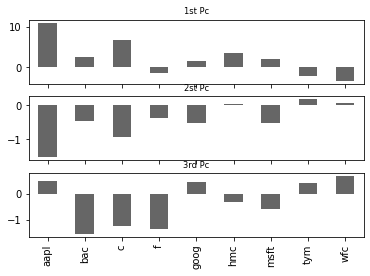

In [10]:
fig, axes = plt.subplots(3,1,sharex = True)
attrib= list(stocks)
pcdata = pd.Series(projected.iloc[:,0])
pcdata.plot(kind='bar',ax = axes[0], color= 'k', alpha= 0.6)
axes[0].set_title(r'1st Pc', size = 'small')
pcdata = pd.Series(projected.iloc[:,1])
pcdata.plot(kind='bar',ax = axes[1], color= 'k', alpha= 0.6)
axes[1].set_title(r'2st Pc', size = 'small')
pcdata = pd.Series(projected.iloc[:,2])
pcdata.plot(kind='bar',ax = axes[2], color= 'k', alpha= 0.6)
axes[2].set_title(r'3rd Pc', size = 'small')